In [1]:
import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

y_test, y_train = y_test.ravel(), y_train.ravel()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000,), (10000, 32, 32, 3), (10000,))

In [2]:
import pandas as pd
df = pd.DataFrame(y_train, columns=['label'])
df["label"].value_counts()

label
6    5000
9    5000
4    5000
1    5000
2    5000
7    5000
8    5000
3    5000
5    5000
0    5000
Name: count, dtype: int64

In [3]:
labels = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]
labels_dict = {i: label for i, label in enumerate(labels)}

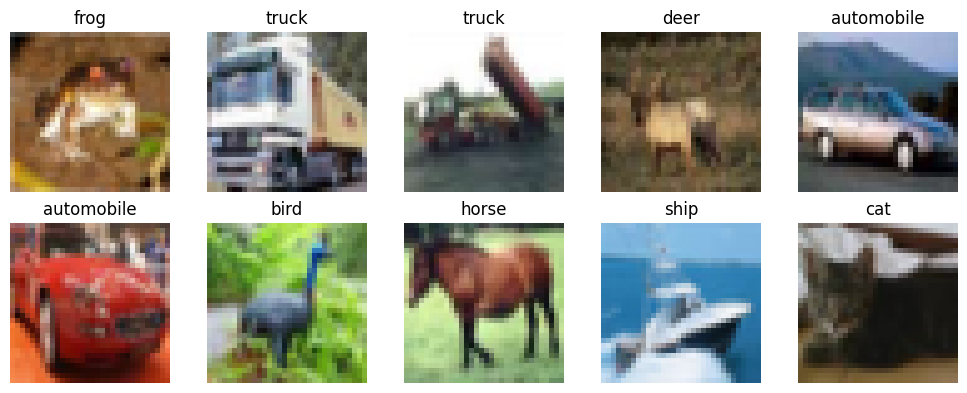

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(ax.flatten()):
    ax.imshow(X_train[i])
    ax.set_title(labels_dict[y_train[i]])
    ax.axis('off')
fig.tight_layout()

In [5]:
scaled_X_train = X_train.astype("float32") / 255
scaled_X_test = X_test.astype("float32") / 255

In [13]:
def CNN_model(learning_rate=0.001, drop_rate=0.5, kernels=[32,64]):
    adam = keras.optimizers.Adam(learning_rate=learning_rate)
    model = keras.models.Sequential(
        name='CNN'
    )
    
    for kern in kernels:
        conv_layer = keras.layers.Conv2D(kern, kernel_size=3, activation='relu', kernel_initializer='he_normal', input_shape=X_train.shape[1:])
        model.add(conv_layer)
        model.add(keras.layers.MaxPooling2D(pool_size=2, strides=2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(drop_rate))
    model.add(keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal'))
    # model.add(keras.layers.Dropout(drop_rate))
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [14]:
model = CNN_model(.001, .5, [32, 64, 32])
model.summary()

c:\KODA\ITHS\9_Deep Learning\DeepLearning\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,450 (286.91 KB)

 Trainable params: 73,450 (286.91 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

early_stop = EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='min')

model.fit(scaled_X_train, y_train, epochs=100, callbacks=[early_stop], validation_split=0.2)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.2269 - loss: 2.0446 - val_accuracy: 0.4514 - val_loss: 1.4980
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4272 - loss: 1.5489 - val_accuracy: 0.5420 - val_loss: 1.2887
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4911 - loss: 1.3874 - val_accuracy: 0.5733 - val_loss: 1.2068
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5406 - loss: 1.2762 - val_accuracy: 0.5910 - val_loss: 1.1734
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5645 - loss: 1.2083 - val_accuracy: 0.6147 - val_loss: 1.1057
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5803 - loss: 1.1694 - val_accuracy: 0.6330 - val_loss: 1.0388
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6016 - loss: 1.1177 - val_accuracy: 0.6403 - val_loss: 1.0415
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6104 - loss: 1

In [17]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.302525,1.850430,0.4514,1.498010
1,0.446625,1.503702,0.5420,1.288653
2,0.503025,1.363431,0.5733,1.206821
3,0.545025,1.265303,0.5910,1.173395
4,0.567350,1.204959,0.6147,1.105709


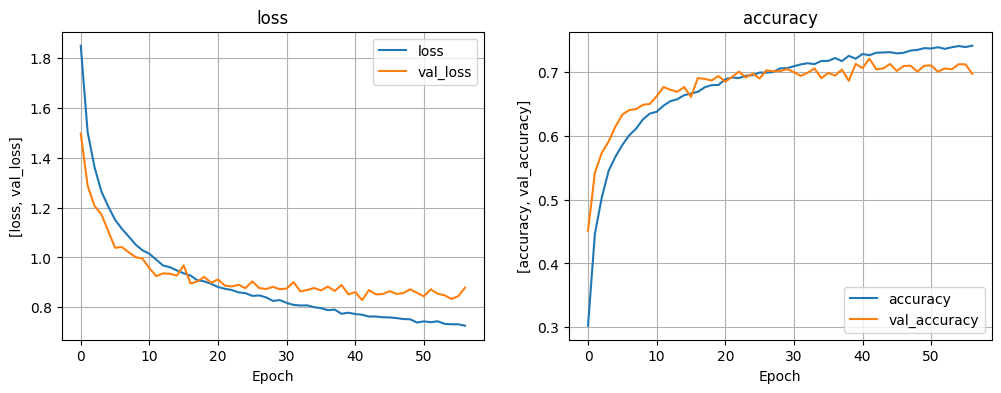

In [19]:
def plot_metrics(df_history, style='-'):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    
    metrics = [['loss', 'val_loss'], ['accuracy', 'val_accuracy']]
    
    for ax, metrics in zip(ax, metrics):
        df_history.plot(ax=ax, style=style, y=metrics, xlabel='Epoch', ylabel=metrics, title=metrics[0], grid=True)

plot_metrics(metrics)

In [20]:
early_stopper = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

def evaluate_model(**kwargs):
    model = CNN_model(**kwargs)
    model.fit(
        scaled_X_train,
        y_train,
        epochs=20,
        callbacks=[early_stopper],
        validation_split=1/6
    )
    metrics = pd.DataFrame(model.history.history)
    
    val_acc = metrics['val_accuracy'].iloc[-1]
    return val_acc

In [21]:
import numpy as np

dropout_accuaracies = {}
for drop_rate in np.arange(.1, .6, .1):
    dropout_accuaracies[drop_rate] = evaluate_model(drop_rate=drop_rate)

c:\KODA\ITHS\9_Deep Learning\DeepLearning\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4044 - loss: 1.6689 - val_accuracy: 0.5971 - val_loss: 1.1543
Epoch 2/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.6223 - loss: 1.0812 - val_accuracy: 0.6613 - val_loss: 0.9870
Epoch 3/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.6916 - loss: 0.8811 - val_accuracy: 0.6717 - val_loss: 0.9409
Epoch 4/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7421 - loss: 0.7431 - val_accuracy: 0.6885 - val_loss: 0.9022
Epoch 5/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7738 - loss: 0.6386 - val_accuracy: 0.6917 - val_loss: 0.9269
Epoch 6/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8128 - loss: 0.5310 - val_accuracy: 0.7016 - val_loss: 0.9209
Epoch 7/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8505 - loss: 0.4346 - val_accuracy: 0.7154 - val_loss: 0.9282
Epoch 8/20
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8805 - loss: 0

<Axes: title={'center': 'Dropout Rate vs Validation Accuracy'}, xlabel='Dropout Rate', ylabel='Validation Accuracy'>

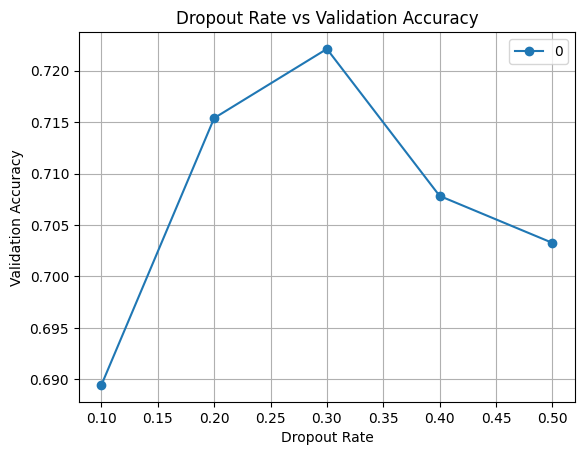

In [25]:
pd.DataFrame(dropout_accuaracies.values(), index=dropout_accuaracies.keys()).plot(
    xlabel='Dropout Rate',
    ylabel='Validation Accuracy',
    title='Dropout Rate vs Validation Accuracy',
    grid=True,
    style='-o'
)

In [26]:
model_final = CNN_model(learning_rate=.001, drop_rate=.3, kernels=[32, 64])
model_final.fit(scaled_X_train, y_train, epochs=20)

c:\KODA\ITHS\9_Deep Learning\DeepLearning\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4002 - loss: 1.6742
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5984 - loss: 1.1331
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6678 - loss: 0.9423
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7153 - loss: 0.8113
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7543 - loss: 0.7005
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7784 - loss: 0.6249
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8060 - loss: 0.5537
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8337 - loss: 0.4761
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8476 - loss: 0.4296
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8607 - loss: 0.3862
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8804 - loss: 0.3430
Epoch 12/20
1563/15

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      1000
           1       0.82      0.84      0.83      1000
           2       0.61      0.61      0.61      1000
           3       0.53      0.49      0.51      1000
           4       0.68      0.61      0.64      1000
           5       0.60      0.63      0.62      1000
           6       0.69      0.84      0.76      1000
           7       0.81      0.71      0.75      1000
           8       0.80      0.81      0.80      1000
           9       0.84      0.75      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'airplane'),
  Text(1, 0, 'automobile'),
  Text(2, 0, 'bird'),
  Text(3, 0, 'cat'),
  Text(4, 0, 'deer'),
  Text(5, 0, 'dog'),
  Text(6, 0, 'frog'),
  Text(7, 0, 'horse'),
  Text(8, 0, 'ship'),
  Text(9, 0, 'truck')])

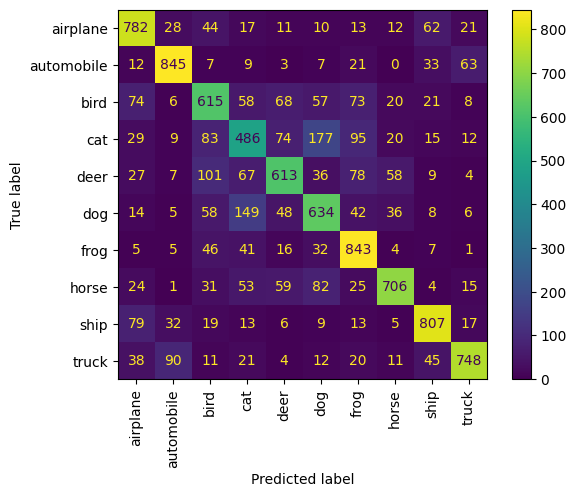

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_final.predict(scaled_X_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
plt.xticks(rotation=90)